In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from tensorflow.keras.models import load_model
from pathlib import Path
from utils.inference_utils import *

In [2]:
saved_model_dir = Path('../../saved_models')
model_files = sorted(saved_model_dir.glob("tomato_model-v*.keras"))
if not model_files:
    raise FileNotFoundError("No versioned model found in saved_models directory.")
latest_model_file = max(model_files, key=lambda p: int(p.stem.split("-v")[-1]))

# Load the latest model
model = load_model(latest_model_file)

## Test model on images from internet

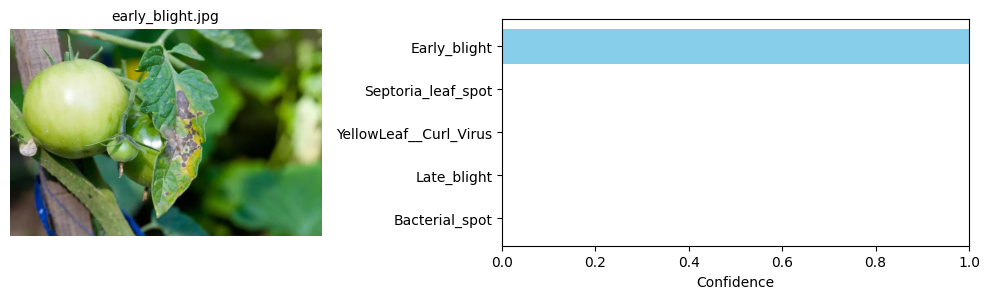

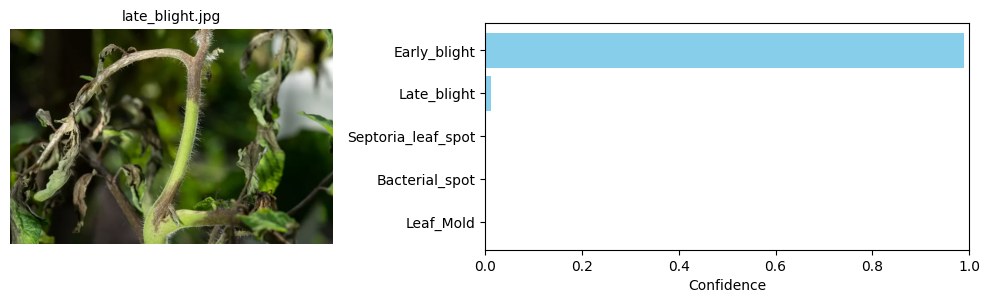

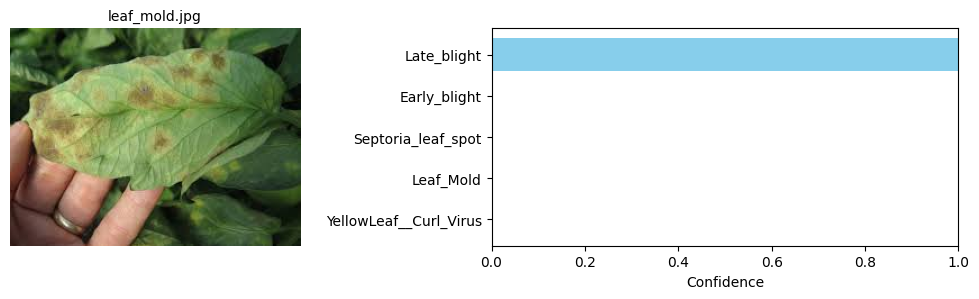

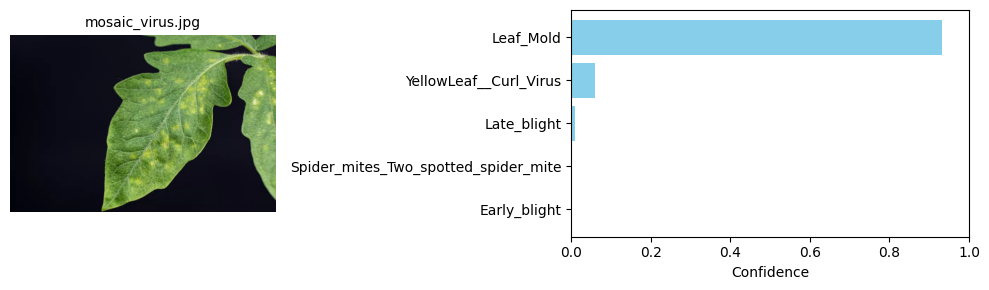

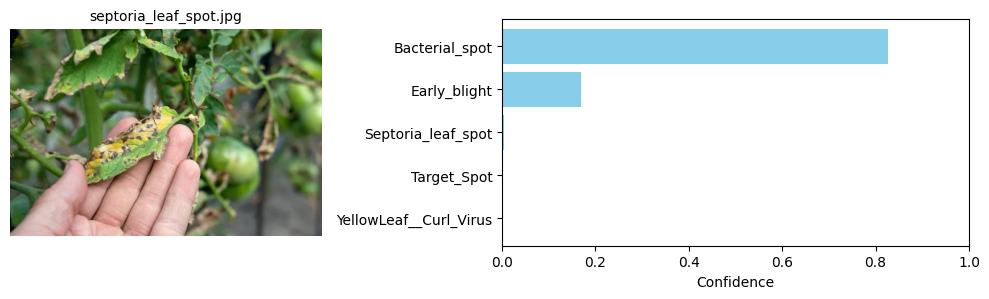

In [3]:
image_dir = Path("../../inference_images")
image_files = list(image_dir.glob("*.jpg"))

for img_path in image_files:
    image = load_image(img_path)
    top_preds = predict_top_k(model, image, CLASS_NAMES, k=5)
    plot_image_with_topk_predictions(image, top_preds, title=img_path.name)